# BUSINESS CASE:- BASED ON THE GIVEN FEATURE OF DATASET WE NEED TO PREDICT THE PERFOMANCE RATING OF EMPLOYEE .`

### MODEL CREATION & EVALUATION SUMMARY:
- Loading pre-process data
- Define dependant & independant features
- Balancing the target feature
- Split training and testing data
- Model creation, prediction & evaluation
- Model saving

## IMPORT BASIC LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import mysql.connector
import warnings
warnings.filterwarnings("ignore")

### LOADING PREPROCESS DATA

In [2]:
data = pd.read_csv('employee_performance_analysis_preprocessed_data.csv')
pd.set_option('display.max_columns',None) # Used to display the all features
data.drop('Unnamed: 0',axis=1,inplace=True) # Drop unwanted feature
data.head()

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11,pca12,pca13,pca14,pca15,pca16,pca17,pca18,pca19,pca20,pca21,pca22,pca23,pca24,pca25,PerformanceRating
0,-4.479794,-1.625800,1.048152,0.935689,-0.917397,1.027783,-0.831539,-1.471238,0.515184,0.449498,-1.242865,-0.169772,-0.859328,-0.263105,1.361126,-0.655418,0.888525,0.099724,-0.470607,0.012552,0.192366,0.199055,-0.502891,0.228337,-0.352744,3
1,-4.356074,-0.068289,2.016174,1.516783,0.418864,-0.582535,-1.714894,0.026681,0.985278,0.830725,-1.723557,1.171481,0.265575,0.276425,0.133615,-0.157664,0.505885,-0.359134,0.420803,-0.929058,-0.495041,0.306019,-0.888367,-0.237236,-0.710042,3
2,-4.243181,2.560962,4.363072,-0.182532,-1.773880,-0.362873,-0.431528,1.308032,0.449781,1.957530,0.189355,2.290069,-1.197808,0.131160,0.786889,-1.267936,-0.624628,0.504683,0.559195,0.081618,-0.256092,-0.242872,-0.434724,-0.356724,0.646996,4
3,3.013748,0.725983,2.326672,3.288183,2.309574,1.909985,1.083119,-0.226786,-0.112988,-0.191132,-0.139197,-1.408616,-0.384020,1.151003,0.504962,1.558104,-0.273501,0.891281,-1.533583,0.700066,0.113402,-0.186438,-0.566017,-0.066069,-0.500048,3
4,-4.246565,5.966600,-0.246302,0.789979,2.096761,-1.712339,0.769025,-0.516950,0.788577,1.125638,-1.642460,0.142828,-0.727865,-0.051626,-1.509516,0.652274,0.614179,-0.295793,0.970469,-1.179984,0.793859,-0.107046,-0.218167,0.456973,-0.147894,3


### DEFINE INDEPENDANT & DEPENDANT FEATURES

In [3]:
X = data.iloc[:,:-1]
y = data.PerformanceRating

In [4]:
X.head()

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11,pca12,pca13,pca14,pca15,pca16,pca17,pca18,pca19,pca20,pca21,pca22,pca23,pca24,pca25
0,-4.479794,-1.625800,1.048152,0.935689,-0.917397,1.027783,-0.831539,-1.471238,0.515184,0.449498,-1.242865,-0.169772,-0.859328,-0.263105,1.361126,-0.655418,0.888525,0.099724,-0.470607,0.012552,0.192366,0.199055,-0.502891,0.228337,-0.352744
1,-4.356074,-0.068289,2.016174,1.516783,0.418864,-0.582535,-1.714894,0.026681,0.985278,0.830725,-1.723557,1.171481,0.265575,0.276425,0.133615,-0.157664,0.505885,-0.359134,0.420803,-0.929058,-0.495041,0.306019,-0.888367,-0.237236,-0.710042
2,-4.243181,2.560962,4.363072,-0.182532,-1.773880,-0.362873,-0.431528,1.308032,0.449781,1.957530,0.189355,2.290069,-1.197808,0.131160,0.786889,-1.267936,-0.624628,0.504683,0.559195,0.081618,-0.256092,-0.242872,-0.434724,-0.356724,0.646996
3,3.013748,0.725983,2.326672,3.288183,2.309574,1.909985,1.083119,-0.226786,-0.112988,-0.191132,-0.139197,-1.408616,-0.384020,1.151003,0.504962,1.558104,-0.273501,0.891281,-1.533583,0.700066,0.113402,-0.186438,-0.566017,-0.066069,-0.500048
4,-4.246565,5.966600,-0.246302,0.789979,2.096761,-1.712339,0.769025,-0.516950,0.788577,1.125638,-1.642460,0.142828,-0.727865,-0.051626,-1.509516,0.652274,0.614179,-0.295793,0.970469,-1.179984,0.793859,-0.107046,-0.218167,0.456973,-0.147894


In [5]:
y.head()

0    3
1    3
2    4
3    3
4    3
Name: PerformanceRating, dtype: int64

**This will transform your original class labels into consecutive integers starting from 0.**

In [6]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)


In [7]:
y

array([1, 1, 2, ..., 1, 1, 0], dtype=int64)

### BALANCING THE TARGET FEATURE

**SMOTE:** SMOTE (synthetic minority oversampling technique) is one of the most commonly used oversampling methods to solve the imbalance problem. It aims to balance class distribution by randomly increasing minority class examples by replicating them. SMOTE synthesises new minority instances between existing minority instances.

In [8]:
from collections import Counter
from imblearn.over_sampling import SMOTE #SMOTE(synthetic minority oversampling techinque)
sm = SMOTE() # obeject creation
print("unbalanced data   :  ",Counter(y))
X_sm,y_sm = sm.fit_resample(X,y)
print("balanced data:    :",Counter(y_sm))

unbalanced data   :   Counter({1: 874, 0: 194, 2: 132})
balanced data:    : Counter({1: 874, 2: 874, 0: 874})


- Now target feature in balance

### SPLIT TRAINING AND TESTING DATA

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_sm,y_sm,random_state=42,test_size=0.20) # 20% data given to testing

In [10]:
# Check shape of train and test
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2097, 25), (525, 25), (2097,), (525,))

### MODEL CREATION, PREDICTION AND EVALUATION

#### HERE WE WILL BE EXPERIMENTING WITH THREE ALGORITHM
1. Support Vector Machine
2. Artificial Neural Network [MLP Classifier]
3. XG Boosting 
4. Random forest
5. KNN 

### 1.SUPPORT VECTOR MACHINE

In [11]:
# importing library
from sklearn.svm import SVC

# Object Creaation
svc = SVC()

# Fitting training and testing data
svc.fit(X_train,y_train)

# Prediction on train data
svc_train_predict = svc.predict(X_train)

# Prediction on test data
svc_test_predict = svc.predict(X_test)

### TRAINING ACCURACY

In [12]:
# import metrics
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,classification_report,confusion_matrix
svc_train_accuracy = accuracy_score(svc_train_predict,y_train)
print("Training accuracy of support vector classifier model",svc_train_accuracy*100)
print("support vector classifier Classification report: \n",classification_report(svc_train_predict,y_train))

Training accuracy of support vector classifier model 96.6142107773009
support vector classifier Classification report: 
               precision    recall  f1-score   support

           0       0.99      0.94      0.97       727
           1       0.91      0.99      0.95       648
           2       0.99      0.97      0.98       722

    accuracy                           0.97      2097
   macro avg       0.97      0.97      0.97      2097
weighted avg       0.97      0.97      0.97      2097



### TESTING ACCURACY

In [13]:
svc_test_accuracy = accuracy_score(svc_test_predict,y_test)
print("Testing accuracy of support vector classifier model",svc_test_accuracy*100)
print("support vector classifier Classification report: \n",classification_report(svc_test_predict,y_test))

Testing accuracy of support vector classifier model 94.66666666666667
support vector classifier Classification report: 
               precision    recall  f1-score   support

           0       0.98      0.94      0.96       192
           1       0.88      0.96      0.92       159
           2       0.98      0.95      0.96       174

    accuracy                           0.95       525
   macro avg       0.95      0.95      0.95       525
weighted avg       0.95      0.95      0.95       525



### 2. ARTIFICIAL NEURAL NETWORK [MLP CLASSIFIER]

In [14]:
from sklearn.neural_network import MLPClassifier
MLP_model=MLPClassifier(hidden_layer_sizes=(50,8),
                   learning_rate_init=0.1,
                   max_iter=100,
                   random_state=2)
# train model
MLP_model.fit(X_sm,y_sm)

# Make prediction on test data
MLPy_test_pred=MLP_model.predict(X_test)

# Make prediction on train data
MLPy_train_pred=MLP_model.predict(X_train)

### TRAINING ACCURACY

In [15]:
mlp_train_accuracy = accuracy_score(MLPy_train_pred,y_train)
print("Training accuracy of MLP model is:",mlp_train_accuracy*100)
print("Classification report of training:"'\n',classification_report(MLPy_train_pred,y_train))

Training accuracy of MLP model is: 92.08392942298522
Classification report of training:
               precision    recall  f1-score   support

           0       1.00      0.92      0.96       747
           1       0.77      1.00      0.87       539
           2       1.00      0.87      0.93       811

    accuracy                           0.92      2097
   macro avg       0.92      0.93      0.92      2097
weighted avg       0.94      0.92      0.92      2097



### TESTING ACCURACY

In [16]:
mlp_test_accuracy = accuracy_score(MLPy_test_pred,y_test)
print("Testing accuracy of MLP model is:",mlp_test_accuracy*100)
print("Classification report of testing:"'\n',classification_report(MLPy_test_pred,y_test))

Testing accuracy of MLP model is: 93.71428571428572
Classification report of testing:
               precision    recall  f1-score   support

           0       0.99      0.95      0.97       192
           1       0.82      0.99      0.90       142
           2       1.00      0.88      0.94       191

    accuracy                           0.94       525
   macro avg       0.94      0.94      0.93       525
weighted avg       0.95      0.94      0.94       525



### 3. XG BOOSTING CLASSIFIER

In [17]:
from xgboost import XGBClassifier

# Initialised model
XGB_model=XGBClassifier()

# train model with training data
XGB_model.fit(X_sm, y_sm)

# test model with testing data
XGBy_test_pred=XGB_model.predict(X_test)

# Make prediction on train data
XGBy_train_pred=XGB_model.predict(X_train)

### TRAINING ACCURACY

In [18]:
xgb_train_accuracy = accuracy_score(XGBy_train_pred,y_train)
print(f"Traning accuracy of XGB Model is: {xgb_train_accuracy*100}")
print(f"Classification report of XGB Model is: \n{classification_report(XGBy_train_pred,y_train)}")

Traning accuracy of XGB Model is: 100.0
Classification report of XGB Model is: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       690
           1       1.00      1.00      1.00       701
           2       1.00      1.00      1.00       706

    accuracy                           1.00      2097
   macro avg       1.00      1.00      1.00      2097
weighted avg       1.00      1.00      1.00      2097



### TESTING ACCURACY

In [19]:
xgb_test_accuracy = accuracy_score(XGBy_test_pred, y_test)
print(f"Testing accuracy of XGB Model is :{xgb_test_accuracy}")
print(f"Testing classification report of XGB Model is \n {classification_report(XGBy_test_pred, y_test)}")

Testing accuracy of XGB Model is :1.0
Testing classification report of XGB Model is 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       184
           1       1.00      1.00      1.00       173
           2       1.00      1.00      1.00       168

    accuracy                           1.00       525
   macro avg       1.00      1.00      1.00       525
weighted avg       1.00      1.00      1.00       525



### 4.RANDOM FOREST

In [20]:
# importing libary and creating object
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100) # 100 decision tree

# fitting training data
rf.fit(X_train,y_train)

# Prediction on testing data
rf_test_predict = rf.predict(X_test)

# Prediction on training data
rf_train_predict = rf.predict(X_train)

### TRAINING ACCURACY

In [21]:
rf_train_accuracy = accuracy_score(rf_train_predict,y_train)
print("Training accuracy of random forest",rf_train_accuracy)
print("Classification report of training: \n",classification_report(rf_train_predict,y_train))

Training accuracy of random forest 1.0
Classification report of training: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       690
           1       1.00      1.00      1.00       701
           2       1.00      1.00      1.00       706

    accuracy                           1.00      2097
   macro avg       1.00      1.00      1.00      2097
weighted avg       1.00      1.00      1.00      2097



### TESTING ACCURACY

In [22]:
rf_test_accuracy = accuracy_score(rf_test_predict,y_test)
print("Testing accuracy of random forest",rf_test_accuracy*100)
print("Classification report of testing: \n",classification_report(rf_test_predict,y_test))

Testing accuracy of random forest 94.66666666666667
Classification report of testing: 
               precision    recall  f1-score   support

           0       0.97      0.96      0.96       186
           1       0.90      0.95      0.92       164
           2       0.98      0.94      0.96       175

    accuracy                           0.95       525
   macro avg       0.95      0.95      0.95       525
weighted avg       0.95      0.95      0.95       525



### 5. KNN CLASSIFIER

In [23]:
from sklearn.neighbors import KNeighborsClassifier

# Creating empty list
error_rate = [] 
for i in range(2,11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_knn_predict = knn.predict(X_test)
    error_rate.append(np.mean(y_knn_predict != y_test))
print("Error rate:",error_rate)

Error rate: [0.16380952380952382, 0.17904761904761904, 0.19047619047619047, 0.1961904761904762, 0.2, 0.20761904761904762, 0.21904761904761905, 0.22095238095238096, 0.21523809523809523]


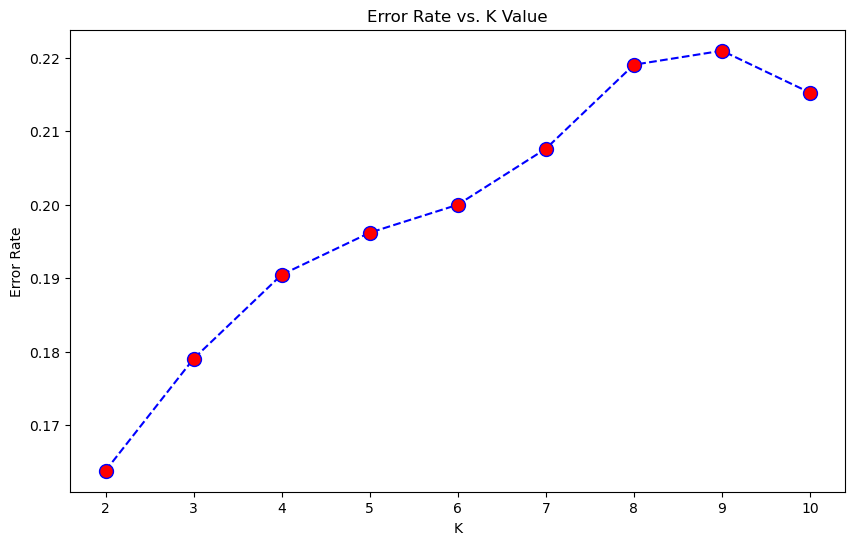

In [24]:
# Step:2 Plotting the error rate
plt.figure(figsize=(10,6))
plt.plot(range(2,11),error_rate,color='blue', linestyle='dashed',marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [25]:
# Step:3 Get nearst neighbors
knn1 = KNeighborsClassifier(n_neighbors=2)

# Step:4 Fitting the training data
knn1.fit(X_train,y_train)

# Step:5 Prediction on testing data
knn_test_predict = knn1.predict(X_test)

# Step:6 Prediction on training data
knn_train_predict = knn1.predict(X_train)

### TRAINING ACCURACY

In [26]:
knn_train_accuracy = accuracy_score(y_train,knn_train_predict)
print("Training accuracy of knn model ",knn_train_accuracy*100)
print("Training classification report:\n",classification_report(knn_train_predict,y_train))

Training accuracy of knn model  94.51597520267048
Training classification report:
               precision    recall  f1-score   support

           0       1.00      0.86      0.92       805
           1       0.84      1.00      0.91       586
           2       1.00      1.00      1.00       706

    accuracy                           0.95      2097
   macro avg       0.95      0.95      0.94      2097
weighted avg       0.95      0.95      0.95      2097



### TESTING ACCURACY

In [27]:
knn_test_accuracy = accuracy_score(y_test,knn_test_predict)
print("Testing accuracy of knn model",knn_test_accuracy*100)
print("Testing classification report: \n",classification_report(y_test,knn_test_predict))

Testing accuracy of knn model 83.61904761904762
Testing classification report: 
               precision    recall  f1-score   support

           0       0.75      1.00      0.86       184
           1       1.00      0.50      0.67       173
           2       0.87      1.00      0.93       168

    accuracy                           0.84       525
   macro avg       0.87      0.83      0.82       525
weighted avg       0.87      0.84      0.82       525



### Conclusion:

- Support Vector Machine demonstrates robust performance on the training data, achieving an accuracy of 96.61%, while the testing score is slightly lower at 94.66%.
- Artificial Neural Network (Multilayer Perceptron) exhibits commendable performance on the training data, achieving an accuracy of 92.08%, and maintains a high testing score of 93.71%.
- XG Boosting consistently performs exceptionally well in both training and testing, attaining a 100% accuracy rate. it raises concerns about overfitting.
- Random Forest achieves a perfect accuracy of 100% on the training data but slightly decreases to 94.66% on the testing set.
- K-Nearest Neighbors performs well on the training data with an accuracy of 94.51%, but the testing score is comparatively lower at 83.61%.
- Considering the overall performance, Support Vector Machine is selected as the preferred model due to its strong accuracy and generalization on both training and testing datasets.

### MODEL SAVING

In [28]:
# saving model with the help of pickle
import pickle

file = open('Support_vector_classifier_model.pkl','wb')
pickle.dump(svc,file)

#### ------------------------------------------------------------------------ THANK YOU ---------------------------------------------------------------------------